## 1.4 协方差分析模型（Covariance Model）
#### 
- 随机效应模型
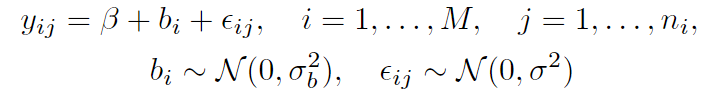

- 回归模型：连续变量对响应变量的影响
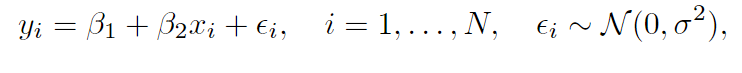

- 两者结合得到协方差分析模型
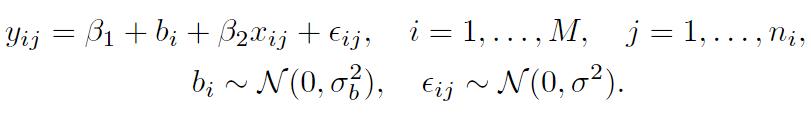

### 案例：线性增长曲线模型（ Linear Growth Curves）
- 对 27 名儿童（其中 16 名男孩，11 名女孩）从 8 岁起每隔两年测量一次其脑垂体到翼上颌裂的距离，一直测到 14 岁。
- 响应变量：脑垂体到翼上颌裂的距离
- 分类变量：性别
- 协变量： 年领
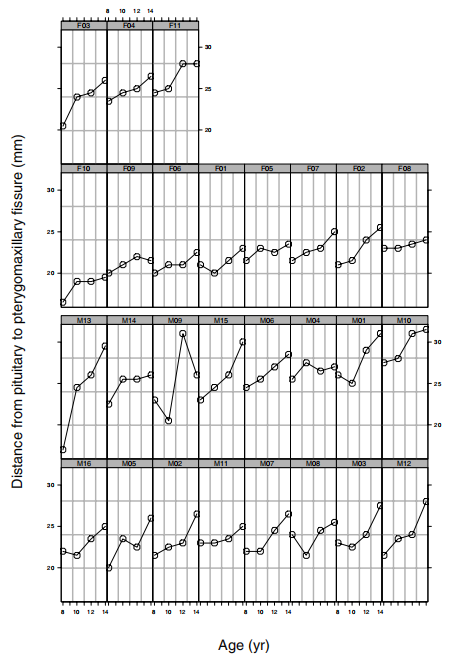

In [2]:
library(nlme)

In [3]:
names( Orthodont )

[1] "distance" "age"      "Subject"  "Sex"

In [4]:
levels( Orthodont$Sex )

[1] "Male"   "Female"

#### 先从最简单的 线性增长曲线模型 开始
- 只考虑年龄对距离的作用

In [5]:
OrthoFem <- Orthodont[ Orthodont$Sex == "Female", ]

- 从图来看，生长曲线的截距，或许还有斜率，在不同女孩之间可能存在差异。
- 用 lmList 对每个女孩单独做回归模型

In [6]:
fm1OrthF.lis <- lmList( distance ~ age, data = OrthoFem )
coef( fm1OrthF.lis )

,(Intercept),age
,<dbl>,<dbl>
F10,13.55,0.450
F09,18.10,0.275
F06,17.00,0.375
F01,17.25,0.375
F05,19.60,0.275
F07,16.95,0.550
F02,14.20,0.800
F08,21.45,0.175
F03,14.40,0.850


In [7]:
intervals( fm1OrthF.lis )

, , (Intercept)

       lower  est.    upper
F10 10.07138 13.55 17.02862
F09 14.62138 18.10 21.57862
F06 13.52138 17.00 20.47862
F01 13.77138 17.25 20.72862
F05 16.12138 19.60 23.07862
F07 13.47138 16.95 20.42862
F02 10.72138 14.20 17.67862
F08 17.97138 21.45 24.92862
F03 10.92138 14.40 17.87862
F04 16.17138 19.65 23.12862
F11 15.47138 18.95 22.42862

, , age

          lower  est.     upper
F10  0.14009962 0.450 0.7599004
F09 -0.03490038 0.275 0.5849004
F06  0.06509962 0.375 0.6849004
F01  0.06509962 0.375 0.6849004
F05 -0.03490038 0.275 0.5849004
F07  0.24009962 0.550 0.8599004
F02  0.49009962 0.800 1.1099004
F08 -0.13490038 0.175 0.4849004
F03  0.54009962 0.850 1.1599004
F04  0.16509962 0.475 0.7849004
F11  0.36509962 0.675 0.9849004


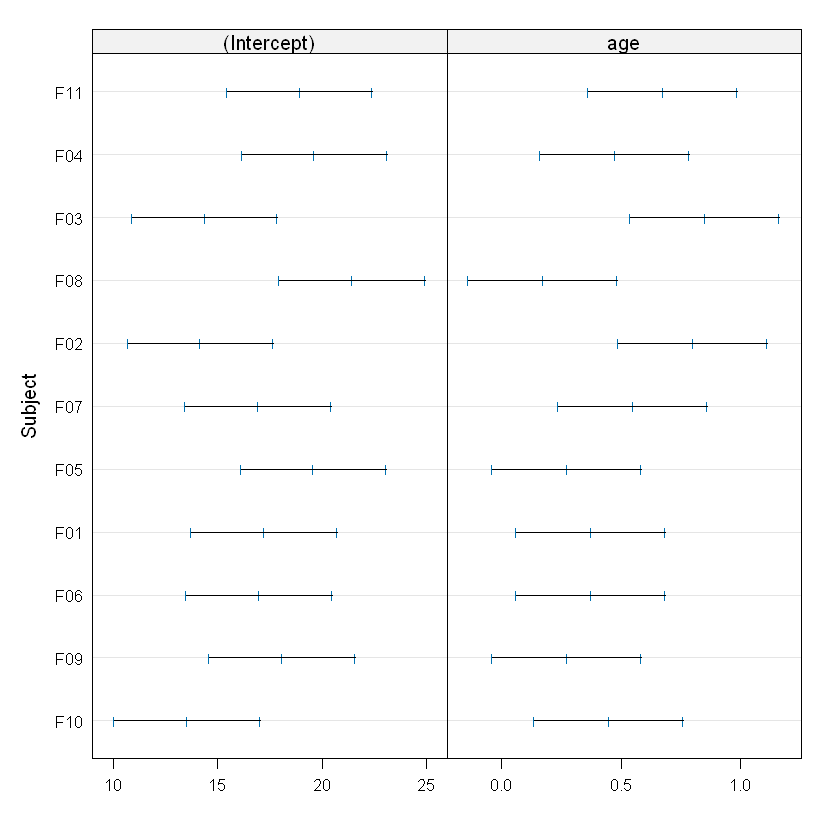

In [8]:
plot( intervals ( fm1OrthF.lis ) )

#### 中心化处理的意义
- 外推回 0 岁时会导致截距与斜率存在高度负相关，年龄减去 11（即对年龄数据进行中心化），可消除这种截距与斜率之间的相关性。
- 这样做之后，拟合的是 11 岁时的距离与年龄区间或生长速率的关系。

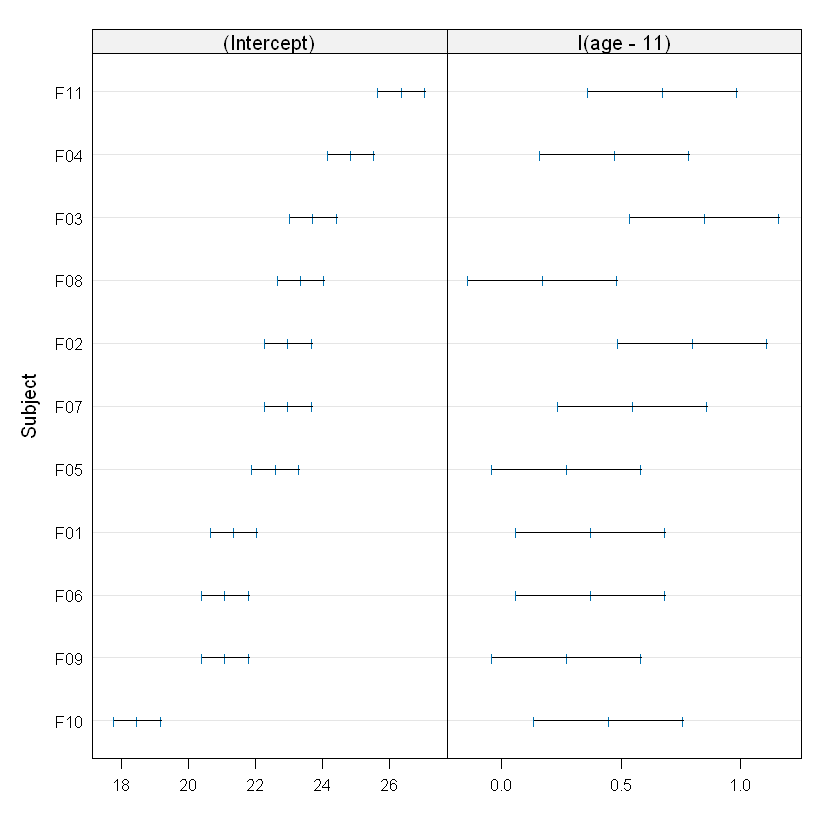

In [9]:
fm2OrthF.lis <- update( fm1OrthF.lis, distance ~ I( age - 11 ) )
plot( intervals( fm2OrthF.lis ) )

#### 混合效应模型建模

In [10]:
fm1OrthF <- lme( distance ~ age, data = OrthoFem, random = ~ 1 | Subject )
summary( fm1OrthF )

Linear mixed-effects model fit by REML
  Data: OrthoFem 
       AIC     BIC    logLik
  149.2183 156.169 -70.60916

Random effects:
 Formula: ~1 | Subject
        (Intercept)  Residual
StdDev:     2.06847 0.7800331

Fixed effects:  distance ~ age 
                Value Std.Error DF   t-value p-value
(Intercept) 17.372727 0.8587419 32 20.230440       0
age          0.479545 0.0525898 32  9.118598       0
 Correlation: 
    (Intr)
age -0.674

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.2736479 -0.7090164  0.1728237  0.4122128  1.6325181 

Number of Observations: 44
Number of Groups: 11 

In [16]:
fm1OrthF <- lme( distance ~ I(age - 11), data = OrthoFem, random = ~ 1 | Subject )
summary( fm1OrthF )

Linear mixed-effects model fit by REML
  Data: OrthoFem 
       AIC     BIC    logLik
  149.2183 156.169 -70.60916

Random effects:
 Formula: ~1 | Subject
        (Intercept)  Residual
StdDev:     2.06847 0.7800331

Fixed effects:  distance ~ I(age - 11) 
                Value Std.Error DF t-value p-value
(Intercept) 22.647727 0.6346568 32 35.6850       0
I(age - 11)  0.479545 0.0525898 32  9.1186       0
 Correlation: 
            (Intr)
I(age - 11) 0     

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.2736479 -0.7090164  0.1728237  0.4122128  1.6325181 

Number of Observations: 44
Number of Groups: 11 

### 模式数学公式
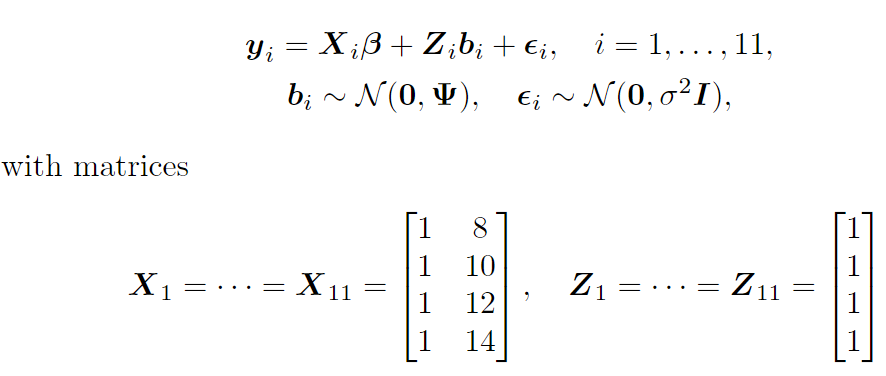

结果

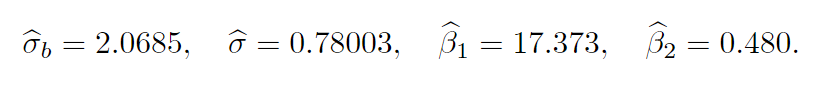

#### 会不会存在年龄的随机效应？

In [11]:
fm2OrthF <- update( fm1OrthF, random = ~ age | Subject )

In [12]:
anova( fm1OrthF, fm2OrthF )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm1OrthF,"lme.formula(fixed = distance ~ age, data = OrthoFem, random = ~1 | Subject)",1,4,149.2183,156.1690,-70.60916,,NA,NA
fm2OrthF,"lme.formula(fixed = distance ~ age, data = OrthoFem, random = ~age | Subject)",2,6,149.4287,159.8547,-68.71435,1 vs 2,3.789622,0.1503468


### 预测固定效应与随机效应

In [13]:
random.effects( fm1OrthF )

,(Intercept)
,<dbl>
F10,-4.00532866
F09,-1.47044943
F06,-1.47044943
F01,-1.22903236
F05,-0.02194701
F07,0.34017860
F02,0.34017860
F08,0.70230420
F03,1.06442981


In [14]:
coef( fm1OrthF )

,(Intercept),age
,<dbl>,<dbl>
F10,13.36740,0.4795455
F09,15.90228,0.4795455
F06,15.90228,0.4795455
F01,16.14369,0.4795455
F05,17.35078,0.4795455
F07,17.71291,0.4795455
F02,17.71291,0.4795455
F08,18.07503,0.4795455
F03,18.43716,0.4795455


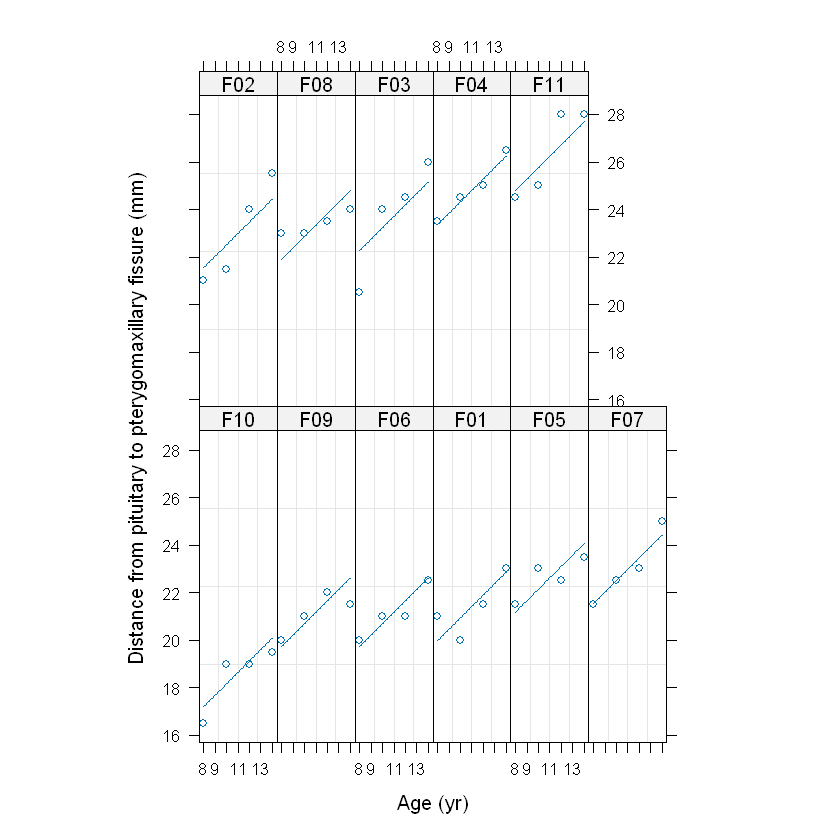

In [17]:
plot( augPred(fm1OrthF), aspect = "xy", grid = T )